# Variable transformations in pdfs/random numbers

## Start from flat

Load the usual libraries:

In [1]:
from math import *
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

Generate flatly distributed random numbers:

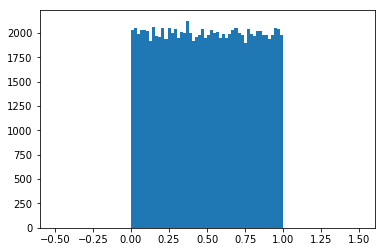

In [2]:
flatRandom = np.random.random(100000) # generates a list of random numbers, flat in [0,1)
h=plt.hist(flatRandom, 100, range=(-0.5, 1.5)) # make histogram with 100 bins from -0.5 to 1.5
plt.show()

## Transforming this to an exponential (as in problem sheet)

Above we generated events distributed according to 

$
p(x) = \left\{ 
  \begin{array}{l l}
    1 & \quad \text{between 0 and 1}\\
	\\
    0 & \quad \text{otherwise}\\
  \end{array} \right.
$

Now want $p(t) = \frac{1}{\tau} e^{-t/\tau}$, but without generating new random numbers. Instead we will use a variable transformation $x \to t(x)$, to change our flat distribution according to $p(t) = p(x) \frac{dx}{dt}$ to an exponential distribution with decay constant $\tau$. 

First we find $t(x)$.
For the $x$ range were $p(x)$ is non-zero:

$ \frac{1}{\tau} e^{-t/\tau} = 1\,\frac{dx}{d t} $

$ x(t)  = -e^{-t/\tau} + C $

$ C - x = e^{-t/\tau} $

$ \log(C-x)  = -\frac{t}{\tau} $

$     t(x)  = -\tau\log(C-x) $

$C$ is an integration constant that we choose to get map the range of $x$ witn non-zero $p(x)$ to the correct range in $y$. Given that $x$ is non-zero
    between $0$ and $1$, to get $p(t)$ non-zero in $t \in [0,\infty)$ we need $C-x \in (0,1]$, which requires $C=1$.
    So finally we get:

$   t(x) = -\tau \log(1-x) $

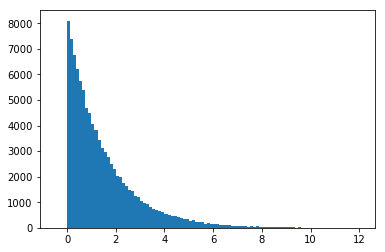

In [3]:
tau=1.5  # about the lifetime of a B meson in ps. Why not? Feel free to try other values.
expRandom = []                # create empty list
for x in flatRandom:          # loop over all x in flatRandom list
    t = - tau*log(1-x)        # calculate t from x
    expRandom.append(t)       # add it to the expRandomList
    
# BTW, in python, there is a way of achieving the same
# effect as the 4 lines above in one single line:
# expRandom = [- tau*log(1-x) for x in flatRandom]

h2=plt.hist(expRandom, 100, range=(-0.5, 8*tau)) # make histogram with 100 bins
plt.show()

## The $y = x^2$ transformation (as in lecture notes)

In the lecture notes, we have shown that the transformation $y = x^2$ transforms the pdf

$
p(x) = \left\{ 
  \begin{array}{l l}
    \dfrac{1}{10} & \quad \text{between 0 and 10}\\
	\\
    0 & \quad \text{otherwise}\\
  \end{array} \right.
$

to 

$
p(y) = \left\{ 
\begin{array}{l l}
	\dfrac{1}{20\sqrt{y}} & \quad \text{between 0 and 100}\\
	\\
	0 & \quad \text{otherwise}\\
\end{array} \right.\nonumber
$

Let's see!

First generate some flatly distributed random numbers between 0 and 10

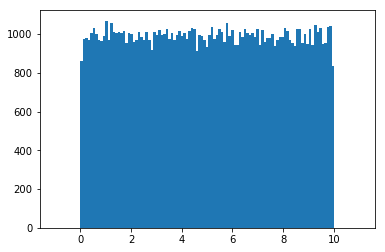

In [4]:
flatRandom_0to10 = np.random.random(100000)*10
h4=plt.hist(flatRandom_0to10, 121, range=(-1, 11)) # make histogram
plt.show()

... and now do the transformation:

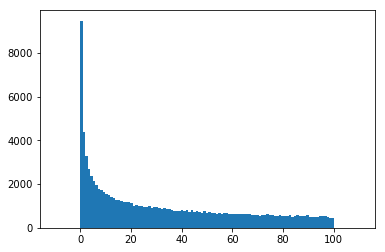

In [5]:
yRandom = [x**2 for x in flatRandom_0to10]
h5=plt.hist(yRandom, 121, range = (-10, 110))
plt.show()